In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('stocks/AAPL.csv')
df = df.loc[ (df['Date'] >= '2015-01-01') & (df['Date'] < '2020-04-01')]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
8588,2015-01-02,111.389999,111.440002,107.349998,109.330002,99.945885,53204600
8589,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.130241,64285500
8590,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.139420,65797100
8591,2015-01-07,107.199997,108.199997,106.699997,107.750000,98.501518,40105900
8592,2015-01-08,109.230003,112.150002,108.699997,111.889999,102.286186,59364500


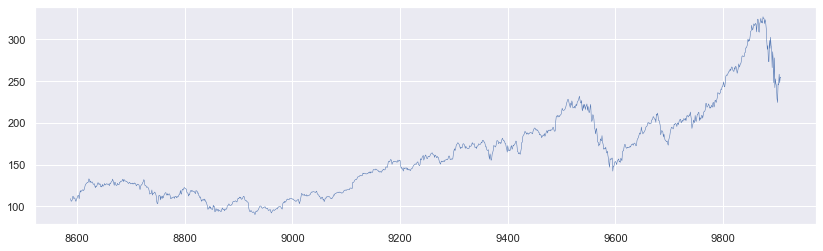

In [3]:
sns.set(rc={'figure.figsize':(14, 4)})
df['Close'].plot(linewidth=0.5);

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
     #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
     # output for dft will give us without defining what the values are.
     #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

The statistics shows that the time series is non-stationary   
as Test Statistic > Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data.   
So, firstly we will try to make the data stationary. For doing so, we need to remove the trend and seasonality from the data.

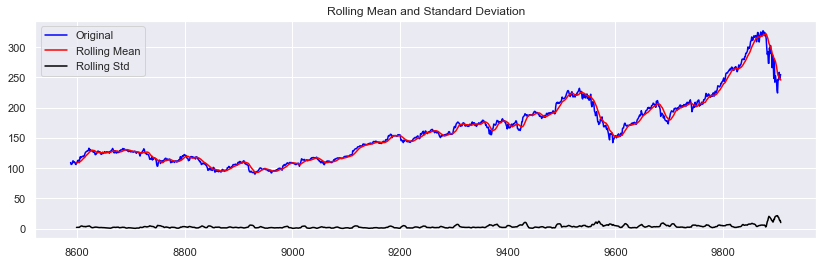

Results of dickey fuller test
Test Statistics                  -1.159874
p-value                           0.690614
No. of lags used                 23.000000
Number of observations used    1296.000000
critical value (1%)              -3.435406
critical value (5%)              -2.863773
critical value (10%)             -2.567959
dtype: float64


In [5]:
test_stationarity(df['Close'])